In [9]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
# Check the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


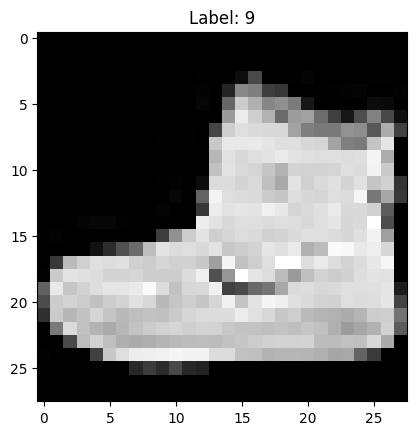

In [10]:
# Display the first image in the training set
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [11]:
#View Class Names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print(f"First image label: {y_train[0]} ({class_names[y_train[0]]})")

First image label: 9 (Ankle Boot)


In [12]:
# Normalize the Data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

In [13]:
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [14]:
# Build the CNN model, 80:20 train:test data ratio
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions
predictions = model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.3734 - loss: 1.6619 - val_accuracy: 0.7218 - val_loss: 0.7617
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.6781 - loss: 0.8586 - val_accuracy: 0.7404 - val_loss: 0.6832
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.7028 - loss: 0.7803 - val_accuracy: 0.7571 - val_loss: 0.6366
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.7196 - loss: 0.7368 - val_accuracy: 0.7695 - val_loss: 0.6083
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.7268 - loss: 0.7128 - val_accuracy: 0.7681 - val_loss: 0.5879
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.7361 - loss: 0.6821 - val_accuracy: 0.7833 - val_loss: 0.5608
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 66ms/step - accuracy: 0.7473 - loss: 0.6573 - val_accuracy: 0.7912 - val_loss: 0.5498
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.7574 - loss: 0.6365 - 

In [25]:
# Function to plot the predictions
def plot_image(pred_idx, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})",
               color=color)

def plot_value_array(pred_idx, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

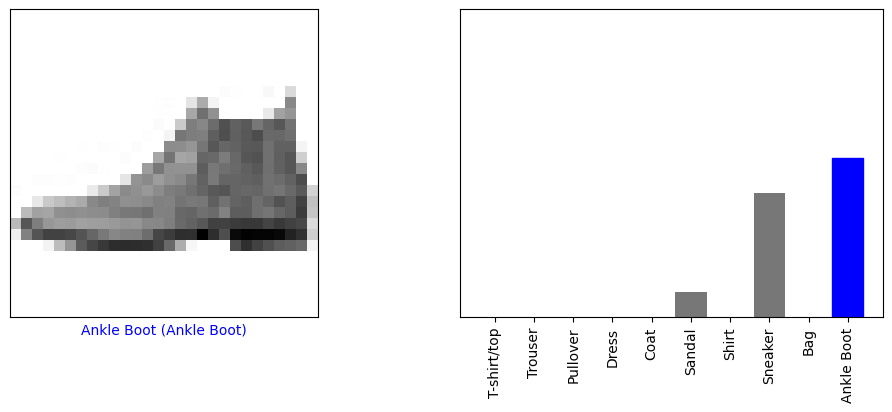

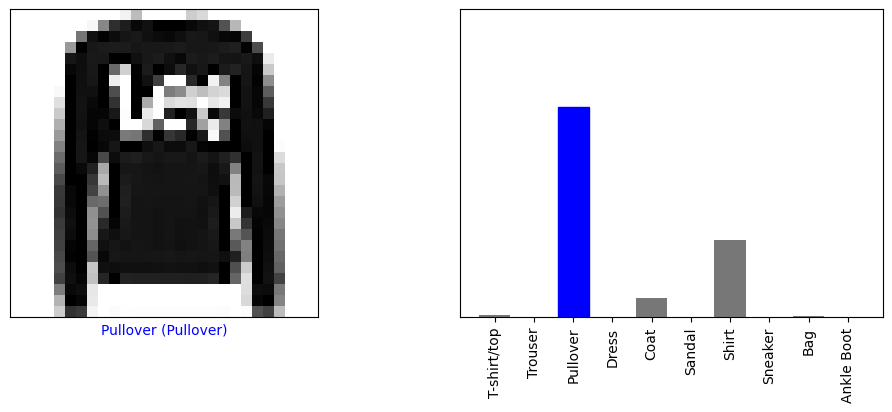

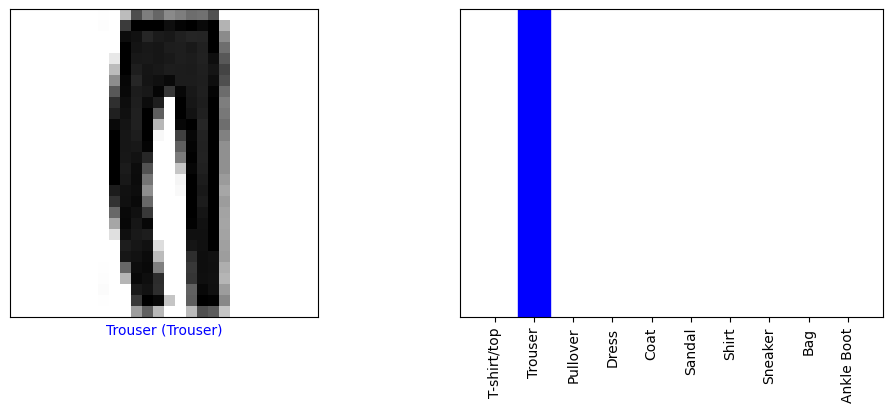

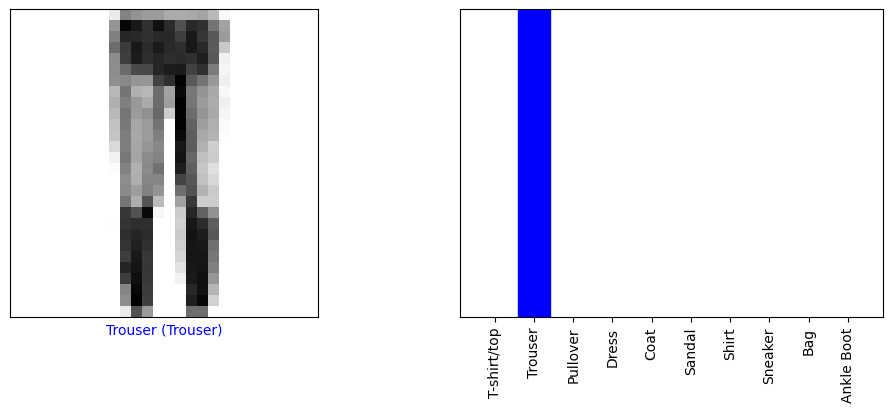

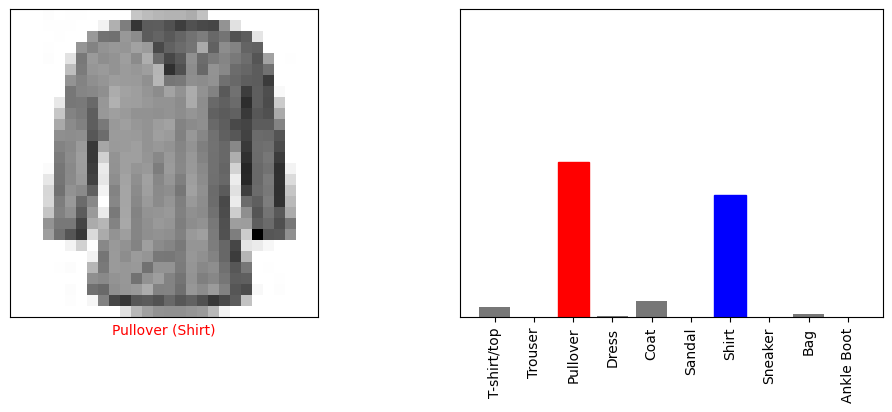

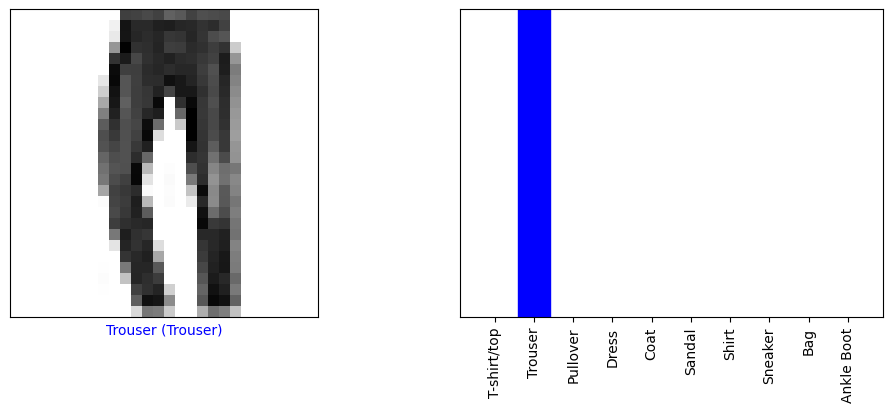

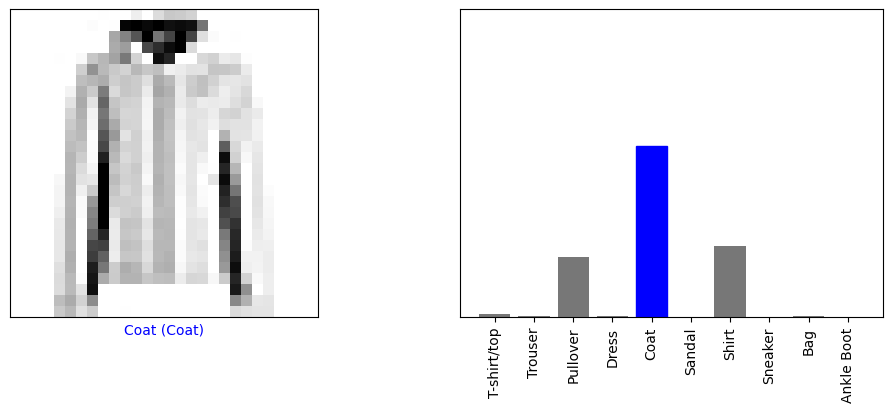

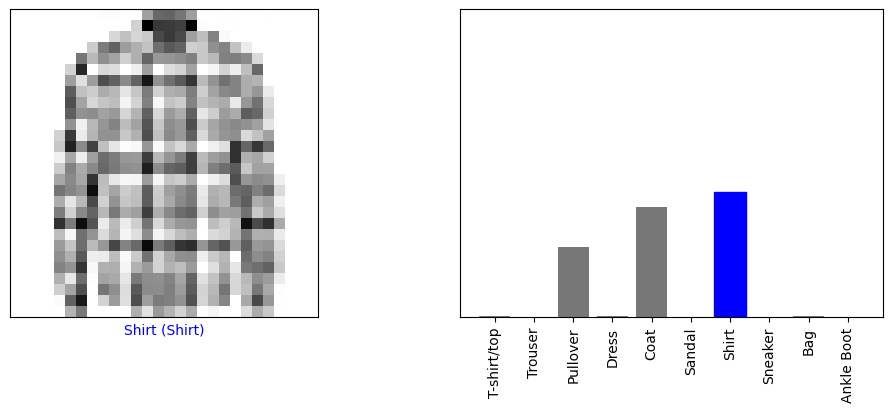

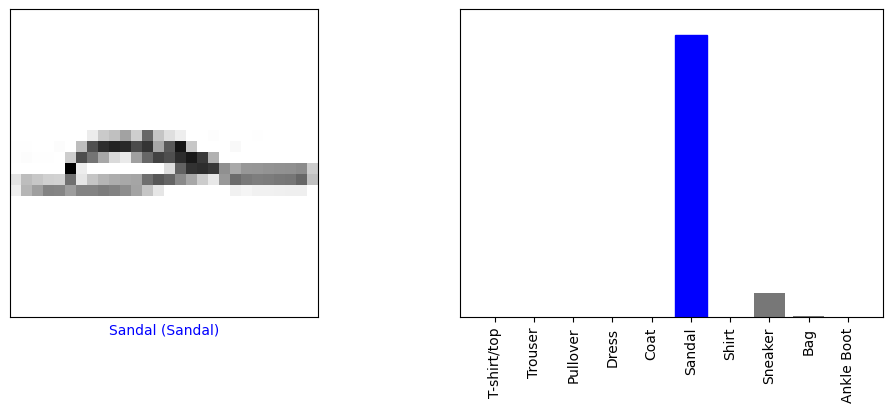

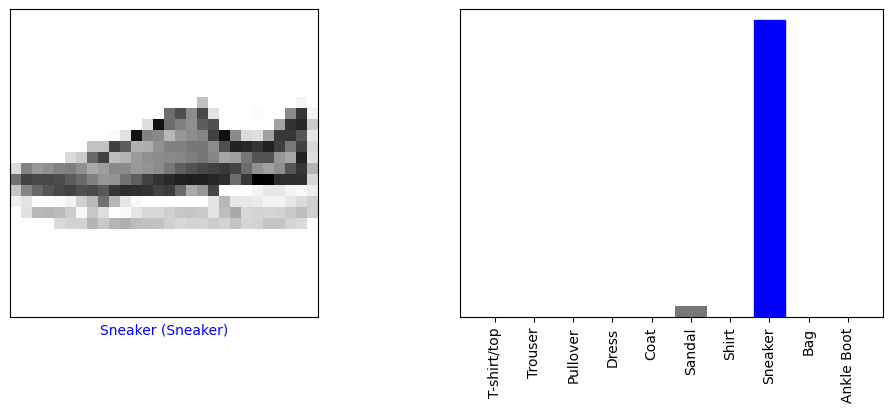

In [30]:
# Visualize predictions for ten test images
for i in range(10):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions[i], y_test[i], x_test[i])
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions[i], y_test[i])
    plt.show()